# Tasing the Wigner-Bloch propagator to obtain the thermal states

Using the quartic oscillator $V(x) \propto x^4$

In [7]:
import matplotlib.pyplot as plt
from split_op_wigner_bloch import np, SplitOpWignerBloch, SplitOpWignerMoyal
from wigner_normalize import WignerSymLogNorm

In [4]:
# parameters of the quantum system
qsys_params = dict(
    t=0.,
    dt=0.05,

    x_grid_dim=256,
    x_amplitude=10.,

    p_grid_dim=256,
    p_amplitude=10.,

    beta=1. / 0.7,

    # kinetic energy part of the hamiltonian
    k=lambda p: 0.5 * p ** 2,

    # potential energy part of the hamiltonian
    v=lambda x: 0.5 * x ** 4,
)

In [5]:
print("Calculating the Gibbs state...")
gibbs_state = SplitOpWignerBloch(**qsys_params).get_thermal_state()

Calculating the Gibbs state...


In [6]:
# Propagate this state via the Wigner-Moyal equation

print("Check that the obtained Gibbs state is stationary under the Wigner-Moyal propagation...")
propagator = SplitOpWignerMoyal(**qsys_params)
final_state = propagator.set_wignerfunction(gibbs_state).propagate(3000)

Check that the obtained Gibbs state is stationary under the Wigner-Moyal propagation...


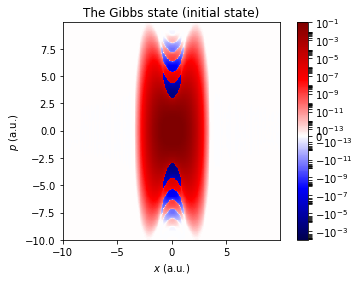

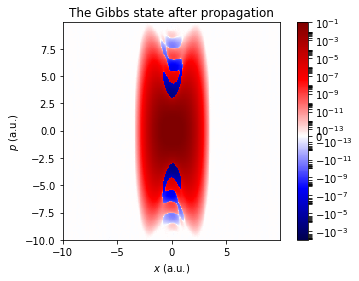

In [9]:
##############################################################################
#
#   Plot the results
#
##############################################################################

# save common plotting parameters
plot_params = dict(
    origin='lower',
    extent=[propagator.x.min(), propagator.x.max(), propagator.p.min(), propagator.p.max()],
    cmap='seismic',
    # make a logarithmic color plot (see, e.g., http://matplotlib.org/users/colormapnorms.html)
    norm=WignerSymLogNorm(linthresh=1e-13, vmin=-0.01, vmax=0.1)
)

plt.title("The Gibbs state (initial state)")
plt.imshow(gibbs_state, **plot_params)
plt.colorbar()
plt.xlabel('$x$ (a.u.)')
plt.ylabel('$p$ (a.u.)')
plt.show()


plt.title("The Gibbs state after propagation")
plt.imshow(final_state, **plot_params)
plt.colorbar()
plt.xlabel('$x$ (a.u.)')
plt.ylabel('$p$ (a.u.)')
plt.show()